Unknown


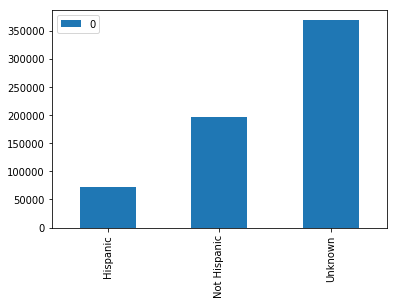

In [1]:
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt

url = "https://www.dropbox.com/sh/4b3dc4rgbrvy2ia/AABC51KK9XLyrTAVvm02Qb0na/database.csv?dl=1"
response = requests.get(url, params={'downloadformat' : 'csv'})

# print(response.headers)

fname = response.headers['Content-Disposition'].split('=')[1].split(";")[0].replace('\"', "")

if response.ok:
    with open(fname, 'wb') as f:
        f.write(response.content)

csv = pd.read_csv(fname, dtype={"Perpetrator Age": object})

dd = csv.as_matrix()

victim_ethnicity, count = np.unique(dd[:,14], return_counts=True)
print(victim_ethnicity[np.argmax(count)])

df = pd.DataFrame(data=count, index=victim_ethnicity)
df.plot.bar()
plt.show()

Handgun


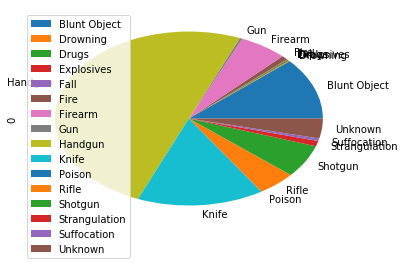

In [17]:
weapons, count = np.unique(dd[(dd[:,15] == "Male")][:,20], return_counts=True)
print(weapons[np.argmax(count)])
df3 = pd.DataFrame(data=count, index=weapons)
df3.plot.pie(subplots=True)
plt.show()

Handgun


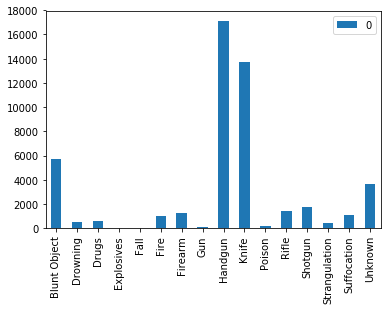

In [9]:
weapons, count = np.unique(dd[(dd[:,15] == "Female")][:,20], return_counts=True)
print(weapons[np.argmax(count)])
df3 = pd.DataFrame(data=count, index=weapons)
df3.plot.bar()
plt.show()

In [22]:
victim_ages = np.unique(dd[:,12])
print("Lowest age of a victim:", np.argmin(victim_ages))
print("Highest age of a victim:", np.argmax(victim_ages))

Lowest age of a victim: 0
Highest age of a victim: 100


In [31]:
ages = np.array(dd[:,12], dtype=np.float)

print(np.average(ages))

[14 43 30 ..., 0 55 0]


AttributeError: 'float' object has no attribute 'dtype'